# 와인 품질 분류

#### 참고한 코드 링크1 : https://dacon.io/competitions/open/235610/codeshare/4221?page=1&dtype=recent
#### 참고한 코드 링크2 : https://dacon.io/codeshare/3793?dtype=recent

## Import library

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

## Load Data

In [2]:
train= pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sample_submission= pd.read_csv("sample_submission.csv")

## Check data

In [3]:
train.head()

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white
3,3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,white
4,4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,white


#### 이후에 type의 경우 숫자로, index의 경우는 data 분석에 쓰이지 않으므로 빼고 학습에 사용
#### quality의 경우는 예측을 제대로 했는지 알기 위함이므로 이것도 제외하고 학습시킨다.

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5497 entries, 0 to 5496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 5497 non-null   int64  
 1   quality               5497 non-null   int64  
 2   fixed acidity         5497 non-null   float64
 3   volatile acidity      5497 non-null   float64
 4   citric acid           5497 non-null   float64
 5   residual sugar        5497 non-null   float64
 6   chlorides             5497 non-null   float64
 7   free sulfur dioxide   5497 non-null   float64
 8   total sulfur dioxide  5497 non-null   float64
 9   density               5497 non-null   float64
 10  pH                    5497 non-null   float64
 11  sulphates             5497 non-null   float64
 12  alcohol               5497 non-null   float64
 13  type                  5497 non-null   object 
dtypes: float64(11), int64(2), object(1)
memory usage: 601.4+ KB


In [5]:
train.describe()

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000
mean,2748.000000,5.818992,7.210115,0.338163,0.318543,5.438075,0.055808,30.417682,115.566491,0.994673,3.219502,0.530524,10.504918
std,1586.991546,0.870311,1.287579,0.163224,0.145104,4.756676,0.034653,17.673881,56.288223,0.003014,0.160713,0.149396,1.194524
min,0.000000,3.000000,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.740000,0.220000,8.000000
25%,1374.000000,5.000000,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,78.000000,0.992300,3.110000,0.430000,9.500000
50%,2748.000000,6.000000,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994800,3.210000,0.510000,10.300000
75%,4122.000000,6.000000,7.700000,0.400000,0.390000,8.100000,0.064000,41.000000,155.000000,0.996930,3.320000,0.600000,11.300000
max,5496.000000,9.000000,15.900000,1.580000,1.660000,65.800000,0.610000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000


## Data Analysis & Visulization

6    2416
5    1788
7     924
4     186
8     152
3      26
9       5
Name: quality, dtype: int64


Text(0.5, 1.0, 'Quality Distribution')

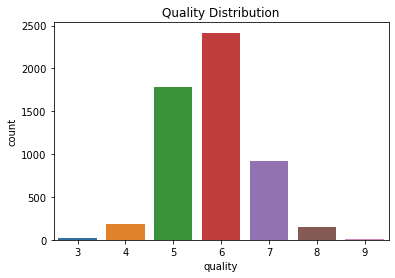

In [6]:
print(train['quality'].value_counts())
sns.countplot(x=train['quality'])
plt.title("Quality Distribution")

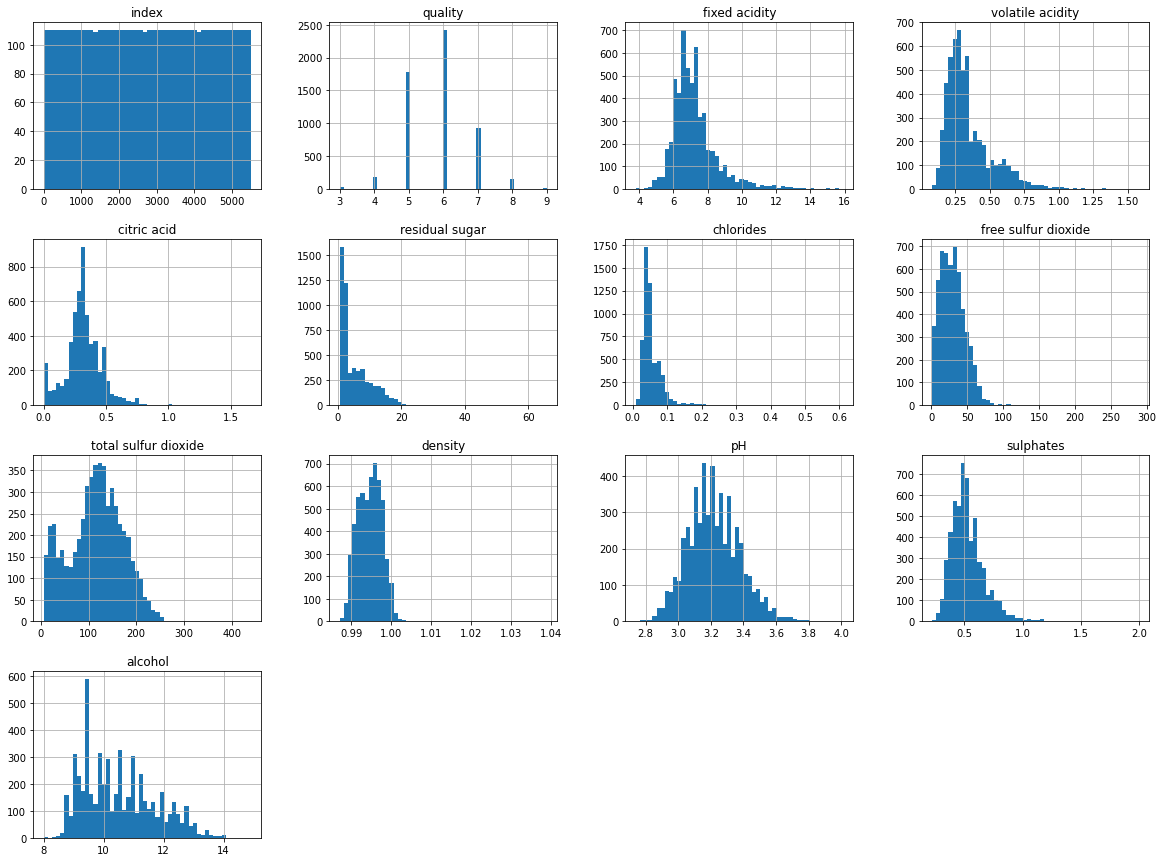

In [7]:
train.hist(bins=50, figsize=(20,15))
plt.show()

## Correlation

<AxesSubplot:>

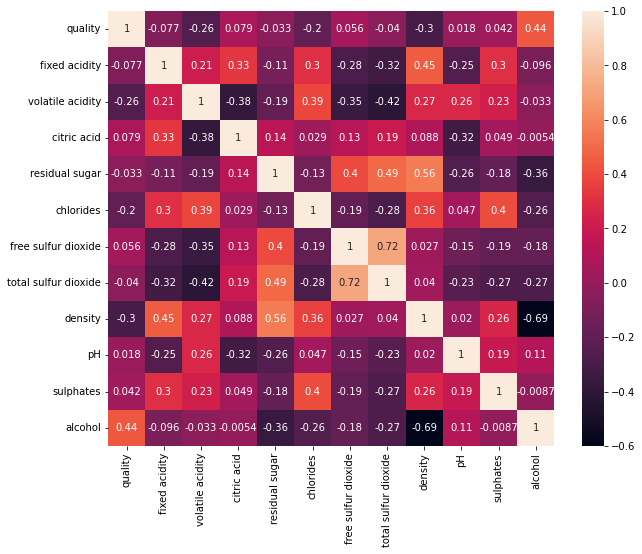

In [8]:
train = train.drop(['index'],axis=1)
corr= train.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, square=False, vmin=-0.6, vmax=1.0)

## Modeling

In [9]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()

train_features = train.select_dtypes(exclude='object').columns.tolist()
train_features.remove('quality')

train[train_features] = standard_scaler.fit_transform(train[train_features])

train['type'] = pd.factorize(train['type'])[0] # white, red -> number

# check
train.head()

,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,5,-1.250611,2.186377,-1.781940,0.286345,-0.398500,-1.211937,-0.560852,-0.117252,1.372128,-0.605988,-0.255287,0
1,5,1.234899,1.665574,-1.230560,-0.638755,0.322998,-1.155351,-1.307080,0.738864,-0.183584,0.398147,-0.841348,1
2,5,0.535849,-0.785265,0.492500,-0.722855,0.034399,-0.532907,0.398583,-0.966732,-1.054782,-0.070450,0.330774,0
3,6,-0.163201,-0.785265,-0.058879,0.118145,-0.283060,-0.080221,-0.134436,-0.256620,0.252016,-0.204334,0.247051,0
4,6,0.458177,0.378883,-0.403491,0.854020,0.092119,0.089537,1.109276,0.274305,-1.117010,-0.672931,0.330774,0


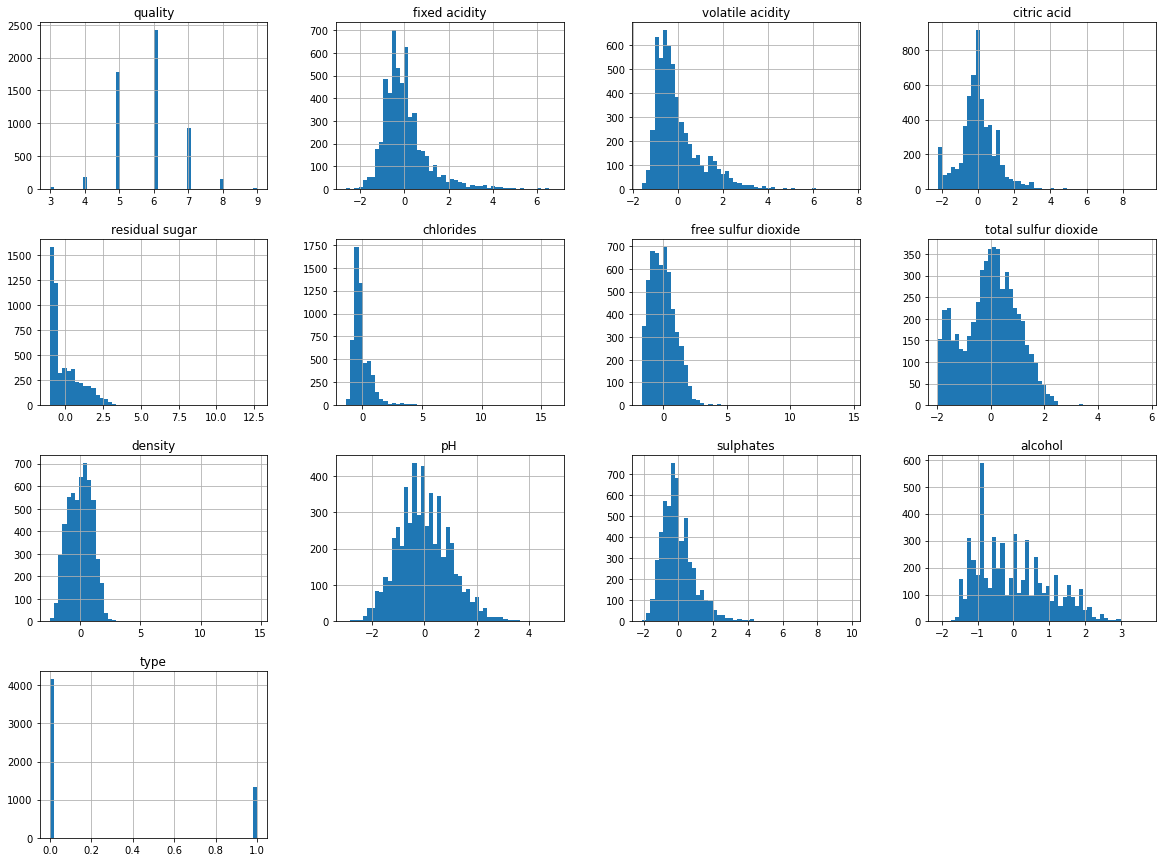

In [10]:
# check scaling result
train.hist(bins=50, figsize=(20,15))
plt.show()

In [11]:
X = train.drop(['quality'],axis=1)
y = train.quality

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [13]:
X_train.shape, X_test.shape

((4122, 12), (1375, 12))

In [14]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

0.6654545454545454
0.6654545454545454


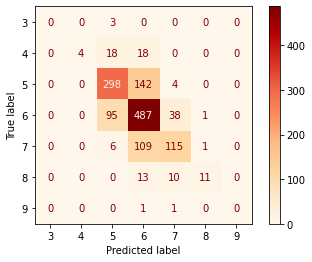

In [15]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
score = rf.score(X_test,y_test)
rf_train_score = rf.score(X_train,y_train)
rf_test_score = rf.score(X_test,y_test)
pred = rf.predict(X_test)
conf_matrix = confusion_matrix(y_test, pred)
print(score)
accuracy = np.mean(y_test == pred)
print(accuracy)
# score == accuracy

plot_confusion_matrix(rf, X_test, y_test, cmap='OrRd')

In [16]:
X_train.shape, test.shape 

((4122, 12), (1000, 13))

In [17]:
test.head() # drop feature, index

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,9.0,0.31,0.48,6.6,0.043,11.0,73.0,0.99380,2.90,0.38,11.6,white
1,1,13.3,0.43,0.58,1.9,0.070,15.0,40.0,1.00040,3.06,0.49,9.0,red
2,2,6.5,0.28,0.27,5.2,0.040,44.0,179.0,0.99480,3.19,0.69,9.4,white
3,3,7.2,0.15,0.39,1.8,0.043,21.0,159.0,0.99480,3.52,0.47,10.0,white
4,4,6.8,0.26,0.26,2.0,0.019,23.5,72.0,0.99041,3.16,0.47,11.8,white


In [18]:
#drop index
test= test.drop(['index'],axis=1)

standard_scaler = StandardScaler()

test[train_features] = standard_scaler.fit_transform(test[train_features])

test['type'] = pd.factorize(test['type'])[0] # white, red -> number

# check
test.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,1.306951,-0.220579,1.098184,0.236865,-0.385503,-1.108531,-0.756734,-0.352060,-1.943080,-1.068114,1.000172,0
1,4.507070,0.477272,1.780836,-0.749722,0.343645,-0.888114,-1.327873,1.915724,-0.949812,-0.311854,-1.203025,1
2,-0.553583,-0.395042,-0.335387,-0.057012,-0.466520,0.709907,1.077835,-0.008456,-0.142782,1.063164,-0.864071,0
3,-0.032634,-1.151046,0.483796,-0.770714,-0.385503,-0.557489,0.731690,-0.008456,1.905833,-0.449356,-0.355641,0
4,-0.330319,-0.511350,-0.403653,-0.728731,-1.033635,-0.419728,-0.774041,-1.516876,-0.329020,-0.449356,1.169649,0


## Make Result and Submission

In [19]:
final_pred = rf.predict(test)

In [20]:
sample_submission['quality'] = final_pred
sample_submission.to_csv("submission.csv",index=False)

In [21]:
submission = pd.read_csv("submission.csv")
submission

,index,quality
0,0,6
1,1,5
2,2,6
3,3,5
4,4,6
...,...,...
995,995,6
996,996,6
997,997,5
998,998,6
